In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/My Drive/BTT - G&M1A/G&M/processed_data files/companies_optimized_targets.csv")
df.head()

,id,name,status,category_code,country_code,state_code,region,founded_at,founded_year,company_age_years,age_group,funding_total_usd,has_funding,failure_risk,risk_tier,risk_tier_label
0,c:1,Wetpaint,operating,web,USA,WA,Seattle,2005-10-17,2005.0,20.0,15+y,39750000.0,1,0,0,low_risk
1,c:10,Flektor,acquired,games_video,USA,CA,Los Angeles,NaN,2007.0,18.0,15+y,NaN,0,1,2,high_risk
2,c:100,There,acquired,games_video,USA,CA,SF Bay,NaN,2007.0,18.0,15+y,NaN,0,1,2,high_risk
3,c:10000,MYWEBBO,operating,network_hosting,NaN,NaN,unknown,2008-07-26,2008.0,17.0,15+y,NaN,0,1,2,high_risk
4,c:10001,THE Movie Streamer,operating,games_video,NaN,NaN,unknown,2008-07-26,2008.0,17.0,15+y,NaN,0,1,2,high_risk


In [6]:
df.shape

(196553, 16)

# Risk Tier Distribution

/tmp/ipython-input-2848421248.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='risk_tier_label', data=df, order=order, palette="Blues_r")


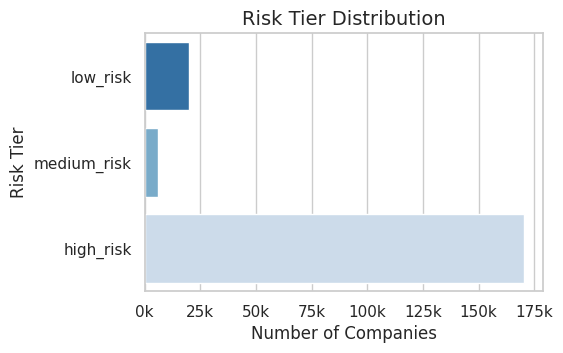

In [ ]:
sns.set(style="whitegrid")

order = ['low_risk', 'medium_risk', 'high_risk']

plt.figure(figsize=(6,4))
sns.countplot(y='risk_tier_label', data=df, order=order, palette="Blues_r")

plt.title("Risk Tier Distribution", fontsize=14)
plt.xlabel("Number of Companies", fontsize=12)
plt.ylabel("Risk Tier", fontsize=12)

# make x-axis labels shorter
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))


plt.tight_layout(pad=2.0)
plt.show()


Most companies fall into the high-risk group, while only a small number are medium or low risk. This shows that most startups in the dataset appear financially vulnerable or less established based on our risk scoring

# Company Status Distribution

/tmp/ipython-input-156979310.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


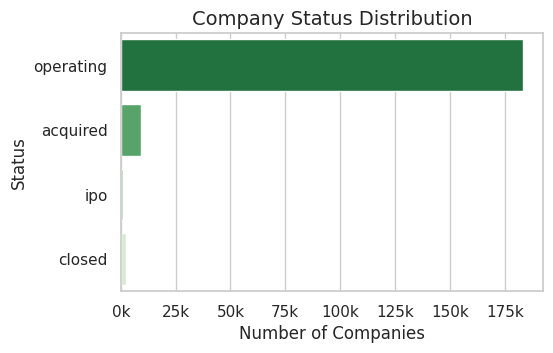

In [ ]:


# Set the order for how the bars appear
order = ['operating', 'acquired', 'ipo', 'closed']

plt.figure(figsize=(6,4))
sns.countplot(
    y='status',
    data=df,
    order=order,
    palette="Greens_r"
)

plt.title("Company Status Distribution", fontsize=14)
plt.xlabel("Number of Companies", fontsize=12)
plt.ylabel("Status", fontsize=12)

# Shorten the x-axis
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x/1000)}k'))

plt.tight_layout(pad=2.0)
plt.show()


Most companies are still operating, while only a few have been acquired, gone public, or closed. This means most startups in the dataset are still active and haven’t yet reached a final outcome.

# Funding Distribution

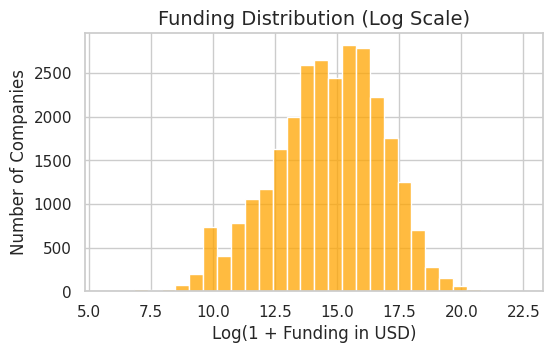

In [ ]:
# drop missing or zero values so log works
funding_data = df['funding_total_usd'].dropna()
funding_data = funding_data[funding_data > 0]

# make the histogram
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(funding_data), bins=30, color='orange')

plt.title("Funding Distribution (Log Scale)", fontsize=14)
plt.xlabel("Log(1 + Funding in USD)", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()


Most companies in our dataset raised a medium amount of funding, roughly between a few hundred thousand and a few million dollars. Only a small number raised very large amounts, which shows that big funding rounds are rare.

# Company Age Distribution

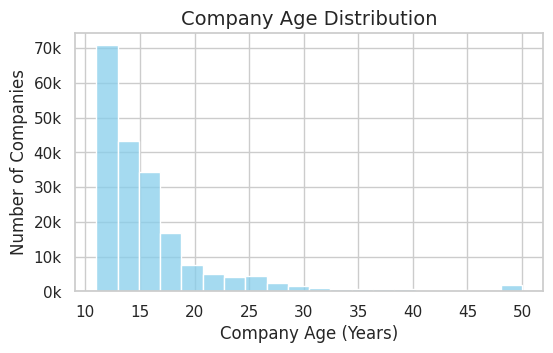

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['company_age_years'].dropna(), bins=20, color='skyblue')

plt.title("Company Age Distribution", fontsize=14)
plt.xlabel("Company Age (Years)", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)

# Shorten the y-axis
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y/1000)}k'))

plt.tight_layout(pad=2.0)
plt.show()

Most of the companies in our dataset are 12–17 years old. The distribution is right-skewed, meaning we have many early-stage firms and fewer older ones.

# Risk by Status

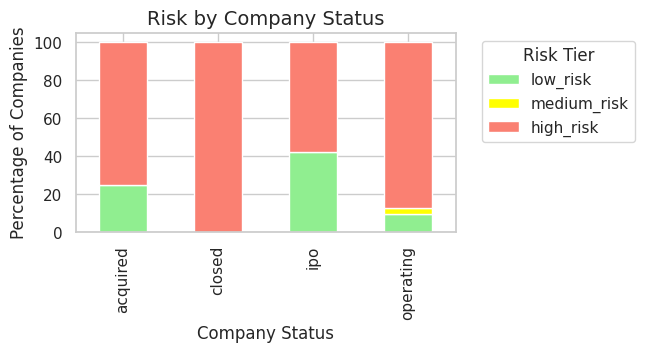

In [ ]:
# make table showing % of each risk level per status
order = ['low_risk', 'medium_risk', 'high_risk']
status_risk = pd.crosstab(df['status'], df['risk_tier_label'], normalize='index')[order] * 100

# plot stacked bar chart
status_risk.plot(kind='bar', stacked=True, figsize=(7,4), color=['lightgreen', 'yellow', 'salmon'])

plt.title("Risk by Company Status", fontsize=14)
plt.xlabel("Company Status", fontsize=12)
plt.ylabel("Percentage of Companies", fontsize=12)
plt.legend(title="Risk Tier", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(pad=2.0)
plt.show()


Closed and operating companies are mostly high risk. IPO and acquired companies have more low-risk firms compared to the others but still show mostly high risk overall.

#Funding by Risk Tier

/tmp/ipython-input-863858893.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


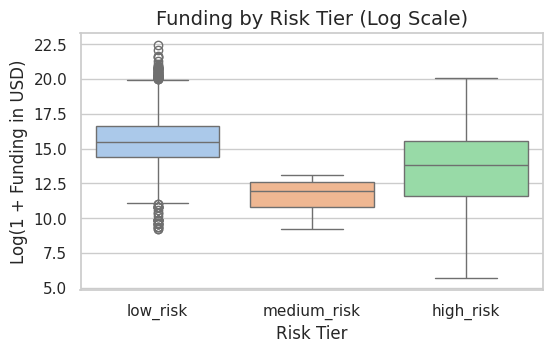

In [ ]:
# keep only rows with funding > 0 so the log works
funding_risk = df[df['funding_total_usd'] > 0]

plt.figure(figsize=(6,4))
sns.boxplot(
    x='risk_tier_label',
    y=np.log1p(funding_risk['funding_total_usd']),
    data=funding_risk,
    palette="pastel"
)

plt.title("Funding by Risk Tier (Log Scale)", fontsize=14)
plt.xlabel("Risk Tier", fontsize=12)
plt.ylabel("Log(1 + Funding in USD)", fontsize=12)

plt.tight_layout(pad=2.0)
plt.show()

This chart shows that low-risk companies usually have higher funding, while medium-risk ones have much less. High-risk companies vary more in how much money they have, with some getting very little and a few raising large amounts. Overall, this suggests that companies with more funding tend to be safer, while those with little money are more likely to be risky.

# Age Group by Risk Tier

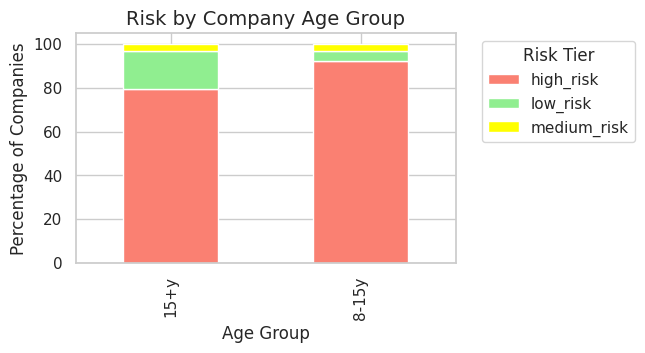

In [ ]:
# group risk tiers by age group
age_risk = pd.crosstab(df['age_group'], df['risk_tier_label'], normalize='index') * 100

# make stacked bar chart
age_risk.plot(kind='bar', stacked=True, figsize=(7,4),
              color=['Salmon', 'lightgreen', 'Yellow'])  # easy colors

plt.title("Risk by Company Age Group", fontsize=14)
plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Percentage of Companies", fontsize=12)

plt.legend(title="Risk Tier", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(pad=2.0)
plt.show()

Both the 8–15 year and 15+ year companies are mostly high risk, but the 15+ group has a bit more low-risk firms than the 8–15 group. This suggests that while many older companies still face high risk, a few long-standing ones have become more stable over time.